In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted
from os.path import exists,basename,join
from glob import glob
import cv2
import os
import numpy as np
%matplotlib inline

In [2]:

npy_dires='plot/not_hoi/npy/'


In [3]:
npy_list=natsorted(glob(npy_dires+'/*.npy'))

In [8]:
basename(npy_list[0])[:-4]

'Eat.Attable_p02_r10_v11_c02'

In [10]:
for i in npy_list:
    foldername=basename(i)[:-4]
    targetfolder=join('plot/not_hoi/imgs/',foldername)
    if not exists(targetfolder):
        os.makedirs(targetfolder)

In [16]:
for video_dire in natsorted(glob(dires+'/*.mp4')):
    cap=cv2.VideoCapture(video_dire)
    video_name=basename(video_dire)[:-4]
    frame_idx=0
    while cap.isOpened():
        sucess,frame=cap.read()
        if not sucess:
            break
        target_folder=os.path.join('plot','HOI','imgs',video_name)
        if not exists(target_folder):
            os.makedirs(target_folder)
        
        filename=os.path.join(target_folder,'{:04d}.jpg'.format(frame_idx))

        cv2.imwrite(filename=filename,img=frame)

        frame_idx+=1

        

   

In [3]:
##img _dire
img_dires='plot/not_hoi/imgs/'
classnames=[i for i in os.listdir(img_dires)]

In [4]:
classnames[0].split('_')[0]

'Eat.Attable'

In [5]:
basename(video_dire)[:-4]

NameError: name 'video_dire' is not defined

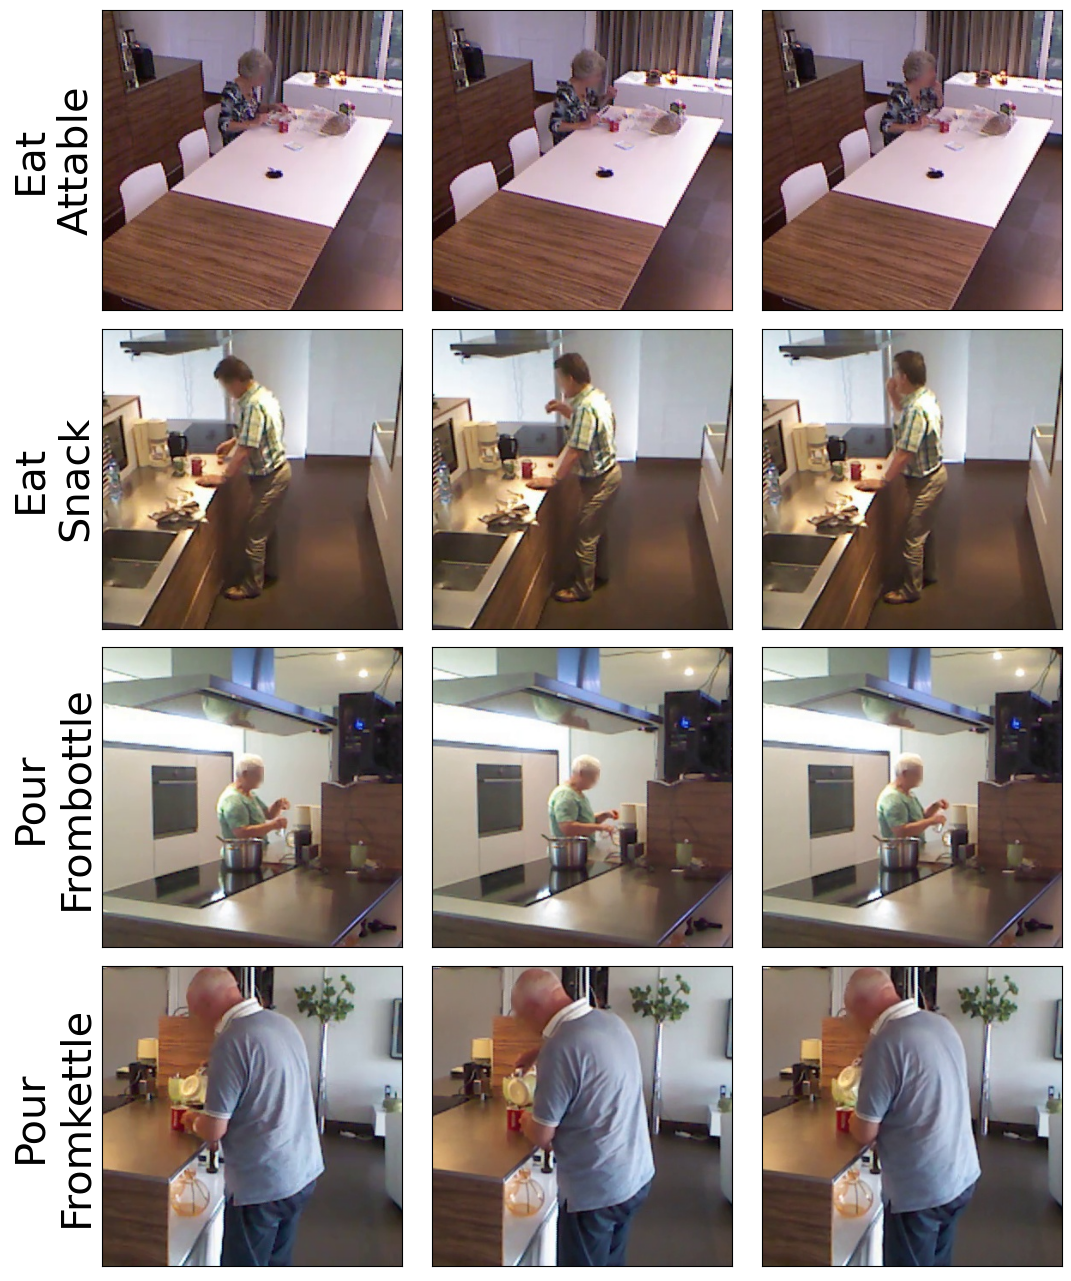

: 

In [14]:


fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(12,18),subplot_kw={'aspect': 'equal'})

# fig.tight_layout()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.8,
                    wspace=0.1,
                    hspace=0.05)

for j,classname in enumerate(natsorted(classnames)):
    
    titlename=classname.split('_')[0].split('.')[0]+'\n'+classname.split('_')[0].split('.')[1]
    for i,img_dire in enumerate(glob((os.path.join(img_dires,classname)+'/*.jpg'))):
        img=cv2.imread(img_dire)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axes[j][i].imshow(img)
        axes[j][i].set_yticks([])
        axes[j][i].set_xticks([])
        

        if i == 0:
            axes[j][i].set_ylabel(titlename,fontsize=30,fontname='Times New Roman' )
       

fig.savefig("{}not_hoi.jpg".format(img_dires), bbox_inches='tight')

In [8]:
import matplotlib as mpl


In [9]:
mpl.rcParams['font.serif'] = ['Times New Roman']